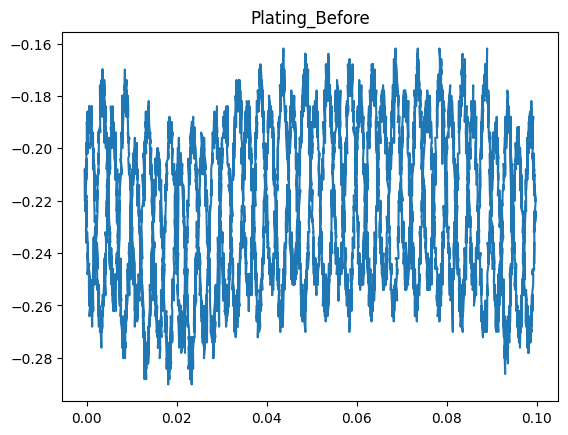

In [ ]:
import time
import sys
import win32pipe, win32file, pywintypes
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

def pipe_client():
    print("pipe client")
    quit = False

    while not quit:
        try:
            handle = win32file.CreateFile(
                r'\\.\pipe\PData',
                win32file.GENERIC_READ | win32file.GENERIC_WRITE,
                0,
                None,
                win32file.OPEN_EXISTING,
                0,
                None
            )
            res = win32pipe.SetNamedPipeHandleState(handle, win32pipe.PIPE_READMODE_MESSAGE, None, None)
            print('Connected')
            while True:
                nAvail=1
                resps=[]
                while nAvail>0:
                    resp = win32file.ReadFile(handle, 64*1024)
                    _, nAvail, nMessage = win32pipe.PeekNamedPipe(handle, 0)
                    print(nAvail)
                    
                    if len(resps)==0:
                        resps=resp[1]
                    else:
                        resps=b"".join([resps,resp[1]])
                     
                    
                graphInfos=  resps[:100].decode('utf-8').strip().split(',')
                graphType=graphInfos[1].strip().lower()
                nX=int(graphInfos[2].strip())
                if nX>0:
                    xdata = np.frombuffer(resps[100:(100+nX)], dtype=float)
                else:
                    xdata =[]
                nY=int(graphInfos[3].strip())

                if nY>0:
                    ydata = np.frombuffer(resps[(100+nX):(100+nX+nY)], dtype=float)
                else:
                    ydata =[]
                clear_output()
                if graphType=='scatter':
                    if nX>0:
                        plt.plot(xdata,ydata)
                    else:
                        plt.plot(ydata)

                    plt.title(graphInfos[0])
                    plt.show()
                
        except pywintypes.error as e:
            if e.args[0] == 2:
                print("-",end='')
            elif e.args[0] == 109:
                print("broken pipe, bye bye")
                
        time.sleep(.25)
    
             
        
pipe_client()


    
    